In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import kmos_tools as KT

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[ERROR] Please install the python package `asciitable`.
[ERROR] Please install asciitable.
[DEBUG] loaded rc file /Users/cmason/Documents/Research/code/matplotlibrc
[DEBUG] backend module://ipykernel.pylab.backend_inline version unknown


# Match catalogs for Binospec targets

- [Load high z LAE catalog](#Load-high-z-LAE-catalog)
    - [match with each other](#Match-catalogs-which-each-other)
    - [match with Sandro's photometric catalogs](#Compare-to-Class-A-and-Class-B-cats)
    - [match with Bouwens and Finkelstein cats](#Match-Bouwens-or-Finkelstein)
        + [which objects are not in common?](#Which-are-the-objects-not-in-common?)
        + [Missing LAEs from phot catalogs](#Missing-LAEs)
        + [**Make cat with Finkelstein coords**](#Make-LAE-cat-with-Finkelstein-coords)
- [MgII targets](#Match-Mg-II)
    + [**Make cats**](#Make-MgII-cat)

In [178]:
phot_highz_A = 'targets/photometry_Finkelstein/high_z_cat_A_without_mag.dat'
phot_highz_B = 'targets/photometry_Finkelstein/high_z_cat_B_without_mag.dat'
phot_MgII    = 'targets/photometry_Finkelstein/MgII_cat.dat'

bouwens     = 'targets/Bouwens_cat.dat'
finkelstein = 'targets/Finkelstein_cat.dat'

LAE_tab   = 'targets/highz_confLya_targets.txt'
MgII_tab  = 'targets/HETDEX_Adams2010_z2LAEs.txt'

## Load high z LAE catalog

In [214]:
LAE_targets = Table.read(LAE_tab, format='ascii')

#### Match catalogs which each other

Are there any common objects?

In [171]:
LAE_coords = SkyCoord(LAE_targets['RA_deg'], LAE_targets['Dec_deg'], unit=(u.deg, u.deg))

# search for matches with each other
idx_c1, idx_c2, d2d, d3d = highz_coords.search_around_sky(LAE_coords, 1*u.arcsec)
for dd, d in enumerate(d2d):
    if d > 0:
        print idx_c1[dd], idx_c2[dd], d.to(u.arcsec)

3 27 0.120633arcsec
27 3 0.120633arcsec


In [172]:
print LAE_targets[3]
print LAE_targets[27]

    ID      RA_deg  Dec_deg  z_Lya Reference
--------- --------- -------- ----- ---------
Hu10_z6_4 189.25412 62.35397 -99.0      Hu10
       ID           RA_deg     Dec_deg   z_Lya Reference
---------------- ----------- ----------- ----- ---------
Stark11_35_22248 189.2541667 62.35394444   5.7   Stark11


# Match Bouwens or Finkelstein

In [211]:
# Load cats
Bouwens_cat     = Table.read(bouwens, format='ascii')
Finkelstein_cat = Table.read(finkelstein, format='ascii')

# Make coords
Bouwens_coords     = SkyCoord(Bouwens_cat['ra'], Bouwens_cat['dec'], unit=(u.deg, u.deg))
Finkelstein_coords = SkyCoord(Finkelstein_cat['ra'], Finkelstein_cat['dec'], unit=(u.deg, u.deg))

In [212]:
# Bouwens matches
idx_Bouwens, idx_LAE_Bouwens, d2d_Bouwens, d3d_Bouwens = LAE_coords.search_around_sky(Bouwens_coords, 0.5*u.arcsec)
print 'Bouwens: matched %i/%i LAEs \n' % (len(idx_LAE_Bouwens), len(LAE_coords))
for dd, d in enumerate(d2d_Bouwens):
    print LAE_targets[idx_LAE_Bouwens[dd]]
    print Bouwens_cat[idx_Bouwens[dd]]
    print d.to(u.arcsec)
    print '===================\n'

Bouwens: matched 15/32 LAEs 

    ID      RA_deg   Dec_deg  z_Lya Reference
--------- ---------- -------- ----- ---------
Hu10_z6_6 189.324677 62.29974 5.663      Hu10
       ID             z_bouw             Hmag                ra                dec       
--------------- ----------------- ------------------ ------------------ -----------------
GNWV-7178817594 5.429999828338623 26.350000381469727 189.32449999999997 62.29983333333333
0.447918arcsec

    ID       RA_deg   Dec_deg  z_Lya Reference
---------- ---------- -------- ----- ---------
Hu10_z6_12 189.320419 62.23344 -99.0      Hu10
       ID             z_bouw             Hmag                ra           dec  
--------------- ----------------- ------------------ ------------------ -------
GNDV-7168714006 5.489999771118164 25.190000534057617 189.32029166666666 62.2335
0.303746arcsec

       ID         RA_deg    Dec_deg   z_Lya Reference
---------------- -------- ----------- ----- ---------
Stark11_24_26902 189.3075 62.32344444  5.

In [213]:
# Finkelstein matches
idx_Finkelstein, idx_LAE_Finkelstein, d2d_Finkelstein, d3d_Finkelstein = LAE_coords.search_around_sky(Finkelstein_coords, 0.5*u.arcsec)

print 'Finkelstein: matched %i/%i LAEs \n' % (len(idx_LAE_Finkelstein), len(LAE_coords))
for dd, d in enumerate(d2d_Finkelstein):
    print LAE_targets[idx_LAE_Finkelstein[dd]]
    print Finkelstein_cat[idx_Finkelstein[dd]]
    print d.to(u.arcsec)
    print '===================\n'

Finkelstein: matched 26/32 LAEs 

    ID      RA_deg  Dec_deg  z_Lya Reference
--------- --------- -------- ----- ---------
Hu10_z6_5 189.39975 62.23944 -99.0      Hu10
     ID            z_fink          ra        dec   
------------ ----------------- ---------- ---------
z5_GND_22781 5.329999923706055 189.399719 62.239494
0.20123arcsec

    ID       RA_deg   Dec_deg  z_Lya Reference
---------- ---------- -------- ----- ---------
Hu10_z6_11 189.366013 62.19613 -99.0      Hu10
     ID            z_fink          ra        dec   
------------ ----------------- ---------- ---------
z5_GND_37006 5.389999866485596 189.365982 62.196171
0.15651arcsec

    ID       RA_deg   Dec_deg  z_Lya Reference
---------- ---------- -------- ----- ---------
Hu10_z6_12 189.320419 62.23344 -99.0      Hu10
     ID            z_fink          ra        dec   
------------ ----------------- ---------- ---------
z5_GND_24948 5.429999828338623 189.320312 62.233444
0.18003arcsec

    ID      RA_deg   Dec_deg  z_Lya 

## Make LAE cat with Finkelstein coords

In [246]:
master_LAE_table = LAE_targets[idx_LAE_Finkelstein].copy()
master_LAE_table['ra']      = Finkelstein_cat[idx_Finkelstein]['ra']
master_LAE_table['dec']     = Finkelstein_cat[idx_Finkelstein]['dec']
master_LAE_table['z_Fink']  = Finkelstein_cat[idx_Finkelstein]['z_fink']
master_LAE_table['ID_Fink'] = Finkelstein_cat[idx_Finkelstein]['ID']
master_LAE_table.remove_columns(['RA_deg', 'Dec_deg'])


new_order = ['ID', 'ra', 'dec', 'ID_Fink', 'z_Lya', 'z_Fink', 'Reference']  # List or tuple
master_LAE_table_reorder = master_LAE_table[new_order]

master_LAE_table_reorder.write('targets/target_lists/knownLAEs_cat_matchFinkelstein.dat', format='ascii.tab')
master_LAE_table_reorder

ID,ra,dec,ID_Fink,z_Lya,z_Fink,Reference
str19,float64,float64,str12,float64,float64,str7
Hu10_z6_5,189.399719,62.239494,z5_GND_22781,-99.0,5.329999923706055,Hu10
Hu10_z6_11,189.365982,62.196171,z5_GND_37006,-99.0,5.389999866485596,Hu10
Hu10_z6_12,189.320312,62.233444,z5_GND_24948,-99.0,5.429999828338623,Hu10
Hu10_z6_9,189.342285,62.262852,z5_GND_14430,-99.0,5.510000228881836,Hu10
Hu10_z6_7,189.032761,62.14397,z5_GNW_6135,5.64,5.010000228881836,Hu10
Hu10_z6_6,189.324554,62.299732,z5_GNW_23799,5.663,5.440000057220459,Hu10
Hu10_z6_4,189.253998,62.353954,z5_GNW_32160,-99.0,5.510000228881836,Hu10
Stark11_35_22248,189.253998,62.353954,z5_GNW_32160,5.7,5.510000228881836,Stark11
Hu10_z6_3,189.055939,62.12999,z5_GNW_3960,5.635,5.519999980926514,Hu10


### Which are the objects not in common?

Finkelstein finds more objects

In [192]:
Fset = set(sorted(idx_LAE_Finkelstein))
Bset = set(sorted(idx_LAE_Bouwens))

only_Fink = Fset ^ Bset

LAE_targets[list(only_Fink)]

ID,RA_deg,Dec_deg,z_Lya,Reference
str19,float64,float64,float64,str7
Hu10_z6_3,189.056106,62.12994,5.635,Hu10
Hu10_z6_4,189.25412,62.35397,-99.0,Hu10
Hu10_z6_5,189.39975,62.23944,-99.0,Hu10
Hu10_z6_7,189.033004,62.14394,5.64,Hu10
Hu10_z6_9,189.342285,62.26277,-99.0,Hu10
Hu10_z7_1,189.35817,62.20769,6.559,Hu10
Jung18_z6_GND_5752,189.199585,62.320965,6.583,Jung18
Stark11_43_3982,189.0391667,62.24758333,5.71,Stark11
Stark11_41_13100,189.1566667,62.11533333,5.81,Stark11


### Missing LAEs

Which objects are missing from both catalogs?

In [201]:
found_LAEs   = np.unique(np.hstack((idx_LAE_Finkelstein, idx_LAE_Bouwens)))
missing_LAEs = list(set(found_LAEs) ^ set(np.arange(len(LAE_targets))))
LAE_targets[missing_LAEs]

ID,RA_deg,Dec_deg,z_Lya,Reference
str19,float64,float64,float64,str7
Hu10_z6_1,189.21524,62.32683,5.675,Hu10
Hu10_z6_2,189.216751,62.3646,5.689,Hu10
Hu10_z6_8,189.456543,62.22942,-99.0,Hu10
Hu10_z6_10,189.045471,62.17144,5.673,Hu10
Hu10_z7_3,189.093689,62.23458,6.56,Hu10
Hu10_z7_4,189.157135,62.17277,6.546,Hu10
Stark11_42_11475,189.1391667,62.18688889,5.95,Stark11


# Match Mg II

Match with coords from 3D-HST catalog

In [227]:
phot_MgII_cat = Table.read(phot_MgII, format='ascii')

MgII_targets = Table.read(MgII_tab, format='ascii', header_start=2)
MgII_targets

ID,RA,DEC,zspec,Rmag,flux_Lya,EW_Lya,FWHM_kms_Lya
float64,float64,float64,float64,float64,float64,float64,float64
395.0,189.18275,62.236111,2.2734,24.09,20.4,39.2,635.0
401.0,189.193458,62.246056,2.002,nan,103.2,3774.9,1118.0
419.0,189.2085,62.233528,2.2349,24.57,24.4,72.3,476.0
434.0,189.226125,62.226667,2.2659,26.89,11.9,298.9,289.0
436.0,189.228917,62.228472,2.4192,25.41,7.5,51.1,322.0
462.0,189.268708,62.246278,2.2128,24.39,78.9,195.4,546.0


In [228]:
MgII_coords      = SkyCoord(MgII_targets['RA'], MgII_targets['DEC'], unit=(u.deg, u.deg))
phot_MgII_coords = SkyCoord(phot_MgII_cat['ra'], phot_MgII_cat['dec'], unit=(u.deg, u.deg))

In [229]:
# Class A matches
idx_phot_MgII, idx_MgII, d2d_Mg, d3d_Mg = MgII_coords.search_around_sky(phot_MgII_coords,  2.*u.arcsec)
print 'matched %i/%i MgII targets \n' % (len(idx_phot_MgII), len(MgII_coords))
for dd, d in enumerate(d2d_Mg):
    print MgII_targets[idx_MgII[dd]]
    print phot_MgII_cat[idx_phot_MgII[dd]]
    print d.to(u.arcsec)
    print '===================\n'

matched 5/6 MgII targets 

  ID      RA        DEC    zspec   Rmag flux_Lya EW_Lya FWHM_kms_Lya
----- ---------- --------- ------ ----- -------- ------ ------------
434.0 189.226125 62.226667 2.2659 26.89     11.9  298.9        289.0
   ID       ra         dec     redshift        Jmag       
------- ---------- ----------- -------- ------------------
16990.0 189.227005 62.22645569    2.216 26.478552186478332
1.66069arcsec

  ID      RA        DEC    zspec   Rmag flux_Lya EW_Lya FWHM_kms_Lya
----- ---------- --------- ------ ----- -------- ------ ------------
434.0 189.226125 62.226667 2.2659 26.89     11.9  298.9        289.0
   ID        ra          dec     redshift        Jmag       
------- ------------ ----------- -------- ------------------
17033.0 189.22576904 62.22662735   2.3155 26.271000524885327
0.61395arcsec

  ID     RA       DEC    zspec   Rmag flux_Lya EW_Lya FWHM_kms_Lya
----- -------- --------- ------ ----- -------- ------ ------------
419.0 189.2085 62.233528 2.2349 24.

## Make MgII cat

In [247]:
# Create nice catalog
master_MgII_table = MgII_targets[idx_MgII].copy()
master_MgII_table['ra']   = phot_MgII_cat[idx_phot_MgII]['ra']
master_MgII_table['dec']  = phot_MgII_cat[idx_phot_MgII]['dec']
master_MgII_table['ID_3DHST'] = phot_MgII_cat[idx_phot_MgII]['ID']

master_MgII_table.remove_columns(['RA', 'DEC'])


new_order = ['ID', 'ra', 'dec', 'ID_3DHST', 'zspec', 'flux_Lya', 'EW_Lya', 'FWHM_kms_Lya']  # List or tuple
master_MgII_table_reorder = master_MgII_table[new_order]

master_MgII_table_reorder.write('targets/target_lists/MgII_cat_match3DHST.dat', format='ascii.tab')
master_MgII_table_reorder

ID,ra,dec,ID_3DHST,zspec,flux_Lya,EW_Lya,FWHM_kms_Lya
float64,float64,float64,float64,float64,float64,float64,float64
434.0,189.227005,62.22645569,16990.0,2.2659,11.9,298.9,289.0
434.0,189.22576904,62.22662735,17033.0,2.2659,11.9,298.9,289.0
419.0,189.20870972,62.23365021,18608.0,2.2349,24.4,72.3,476.0
395.0,189.18365479,62.23613739,19140.0,2.2734,20.4,39.2,635.0
462.0,189.26806641,62.24618149,21290.0,2.2128,78.9,195.4,546.0


# Compare to Class A and Class B cats

In [210]:
# Load cats
phot_highz_A_cat = Table.read(phot_highz_A, format='ascii')
phot_highz_B_cat = Table.read(phot_highz_B, format='ascii')

# Make coords
phot_highz_A_coords = SkyCoord(phot_highz_A_cat['ra'], phot_highz_A_cat['dec'], unit=(u.deg, u.deg))
phot_highz_B_coords = SkyCoord(phot_highz_B_cat['ra'], phot_highz_B_cat['dec'], unit=(u.deg, u.deg))

print len(phot_highz_A_cat), len(phot_highz_B_cat)

200 377


In [208]:
# Class A matches
idx_photA, idx_LAE_A, d2d_A, d3d_A = LAE_coords.search_around_sky(phot_highz_A_coords, 0.5*u.arcsec)
print 'Class A: matched %i/%i LAEs \n' % (len(idx_LAE_A), len(LAE_coords))
for dd, d in enumerate(d2d_A):
    print LAE_targets[idx_LAE_A[dd]]
    print phot_highz_A_cat[idx_photA[dd]]
    print d.to(u.arcsec)
    print '===================\n'
    
# Class B matches
idx_photB, idx_LAE_B, d2d_B, d3d_B = LAE_coords.search_around_sky(phot_highz_B_coords, 0.5*u.arcsec)
print 'Class B: matched %i/%i LAEs \n' % (len(idx_LAE_B), len(LAE_coords))
for dd, d in enumerate(d2d_B):
    print LAE_targets[idx_LAE_B[dd]]
    print phot_highz_B_cat[idx_photB[dd]]
    print d.to(u.arcsec)
    print '===================\n'

Class A: matched 14/32 LAEs 

    ID      RA_deg   Dec_deg  z_Lya Reference
--------- ---------- -------- ----- ---------
Hu10_z6_9 189.342285 62.26277 -99.0      Hu10
     ID      z_fink z_bouw  Hmag     ra        dec   
------------ ------ ------ ----- ---------- ---------
z5_GND_14430   5.51   5.56 25.34 189.342285 62.262852
0.2952arcsec

       ID         RA_deg    Dec_deg   z_Lya Reference
---------------- -------- ----------- ----- ---------
Stark11_24_26902 189.3075 62.32344444  5.94   Stark11
     ID      z_fink z_bouw  Hmag     ra        dec   
------------ ------ ------ ----- ---------- ---------
z6_GNW_20152   5.84   5.89 26.62 189.307617 62.323444
0.195645arcsec

       ID           RA_deg     Dec_deg   z_Lya Reference
---------------- ----------- ----------- ----- ---------
Stark11_32_16773 189.1979167 62.19997222  5.97   Stark11
     ID      z_fink z_bouw  Hmag    ra       dec   
------------ ------ ------ ----- -------- ---------
z6_GND_35989   5.75   5.76 27.31 189.1978

18
         ID            RA_deg     Dec_deg   z_Lya Reference
------------------- ----------- ----------- ----- ---------
          Hu10_z6_9  189.342285    62.26277 -99.0      Hu10
   Stark11_24_26902    189.3075 62.32344444  5.94   Stark11
   Stark11_32_16773 189.1979167 62.19997222  5.97   Stark11
   Stark11_41_13100 189.1566667 62.11533333  5.81   Stark11
    Stark11_42_6706 189.0795833 62.14188889  5.97   Stark11
   Stark11_24_28120 189.3216667 62.29011111  5.97   Stark11
   Stark11_32_16773 189.1979167 62.19997222  5.97   Stark11
   Stark11_33_17705 189.2083333 62.23213889   5.8   Stark11
Jung18_z6_GND_28438  189.177979   62.223713 6.551    Jung18
   Stark11_33_19990 189.2308333 62.25233333  5.99   Stark11
   Stark11_34_24923 189.2845833     62.2875  5.94   Stark11
   Stark11_42_13066   189.15625 62.19772222  5.61   Stark11
    Stark11_43_3982 189.0391667 62.24758333  5.71   Stark11
          Hu10_z7_2  189.356873    62.29541 -99.0      Hu10
          Hu10_z6_6  189.324677    62

Text(8.75,0.5,'$\\Delta$ Dec')

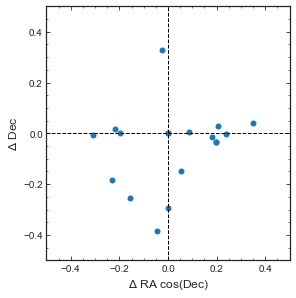

In [209]:
# Compare coords
idx_LAE_matched = np.hstack((idx_LAE_A, idx_LAE_B)).ravel()
LAE_matched     = LAE_targets[idx_LAE_matched]
phot_matched    = np.hstack((phot_highz_A_cat[idx_photA], phot_highz_B_cat[idx_photB]))
print len(LAE_matched)
print LAE_matched

deltaRA  = 3600*(LAE_matched['RA_deg']-phot_matched['ra'])*np.cos(phot_matched['dec'] * np.pi/180.)
deltaDec = 3600*(LAE_matched['Dec_deg']-phot_matched['dec'])

print np.mean(deltaRA),  np.std(deltaRA)
print np.mean(deltaDec), np.std(deltaDec)


plt.figure(figsize=(4,4))
plt.scatter(deltaRA, deltaDec)
plt.axvline(0., ls='dashed', lw=1, c='k')
plt.axhline(0., ls='dashed', lw=1, c='k')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.xlabel('$\Delta$ RA cos(Dec)')
plt.ylabel('$\Delta$ Dec')